In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # 설치 필요: pip install xgboost

# 데이터 생성 라이브러리
from sklearn.datasets import make_classification

# 1. 가상 데이터 생성 (분류 문제)
# 1000개의 데이터, 20개의 특성(질문) 중 유의미한 건 15개
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=15, n_redundant=5, 
                           random_state=42)

# 2. 학습용(Train) vs 평가용(Test) 분리 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"데이터 준비 완료: 학습용 {X_train.shape}, 평가용 {X_test.shape}")

데이터 준비 완료: 학습용 (800, 20), 평가용 (200, 20)


In [2]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("=== 🌲 Random Forest 성적표 ===")
print(f"정확도: {accuracy_score(y_test, rf_pred):.4f}")

=== 🌲 Random Forest 성적표 ===
정확도: 0.9000


In [3]:
# eval_metric='logloss': 학습 과정을 평가하는 함수 지정 (경고 방지용)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("=== 🚀 XGBoost 성적표 ===")
print(f"정확도: {accuracy_score(y_test, xgb_pred):.4f}")

=== 🚀 XGBoost 성적표 ===
정확도: 0.9200


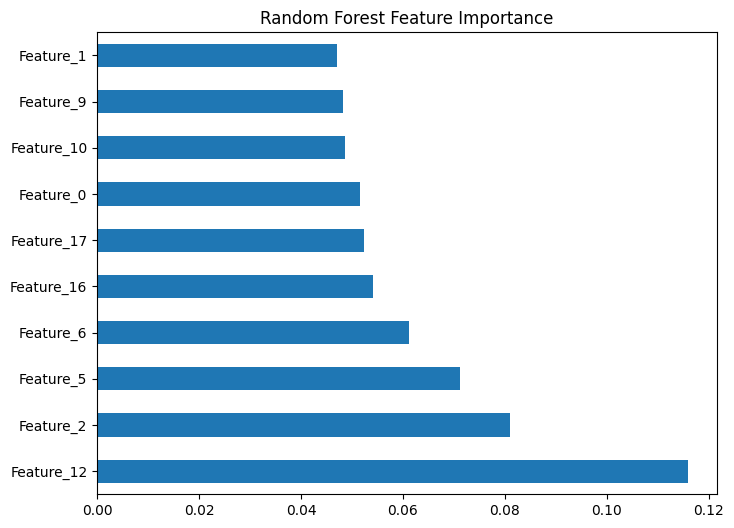

In [4]:
importances = rf_model.feature_importances_
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

feat_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(8, 6))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# 1. 극단적으로 불균형한 데이터 생성 (95% : 5%)
X_imb, y_imb = make_classification(n_samples=1000, n_features=10, 
                                   n_informative=5, n_redundant=0,
                                   weights=[0.95], flip_y=0, random_state=42)

# 학습/평가 분리
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42, stratify=y_imb)

print(f"--- 데이터 비율 확인 ---\n0(다수): {sum(y_train==0)}개, 1(소수): {sum(y_train==1)}개")

# 2. 그냥 모델 (문제점: 소수 클래스 무시)
model_base = XGBClassifier(random_state=42)
model_base.fit(X_train, y_train)
pred_base = model_base.predict(X_test)

# 3. 편향 해결 모델 (scale_pos_weight 적용)
# 가중치 계산: (0 개수) / (1 개수)
weight = sum(y_train==0) / sum(y_train==1)
model_weighted = XGBClassifier(scale_pos_weight=weight, random_state=42)
model_weighted.fit(X_train, y_train)
pred_weighted = model_weighted.predict(X_test)

print("\n=== [1] 그냥 돌렸을 때 (재현율 확인) ===")
print(classification_report(y_test, pred_base))

print(f"\n=== [2] 가중치({weight:.1f}) 줬을 때 ===")
print(classification_report(y_test, pred_weighted))

--- 데이터 비율 확인 ---
0(다수): 760개, 1(소수): 40개

=== [1] 그냥 돌렸을 때 (재현율 확인) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       190
           1       1.00      0.60      0.75        10

    accuracy                           0.98       200
   macro avg       0.99      0.80      0.87       200
weighted avg       0.98      0.98      0.98       200


=== [2] 가중치(19.0) 줬을 때 ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       190
           1       0.89      0.80      0.84        10

    accuracy                           0.98       200
   macro avg       0.94      0.90      0.92       200
weighted avg       0.98      0.98      0.98       200

